In [ ]:
#Mount my drive- run the code, go to the link, accept.
from google.colab import drive
drive.mount('/content/gdrive')

#Change working directory to make it easier to access the files
import os
os.chdir("/content/gdrive/My Drive/Colab Notebooks/dinn/experiments/real_data")
os.getcwd() 

Mounted at /content/gdrive


'/content/gdrive/My Drive/Colab Notebooks/dinn/experiments/real_data'

In [ ]:
# Data from https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data#usa-daily-state-reports-csse_covid_19_daily_reports_us

In [ ]:
import torch
from torch.autograd import grad
import torch.nn as nn
from numpy import genfromtxt
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
import pandas as pd 
import os
import re
import numpy as np

torch.manual_seed(1234)

In [ ]:
cumulative_infected_list = []
cumulative_dead_list = []
cumulative_recovered_list = []

daily_infected_list = []
daily_dead_list = []
daily_recovered_list = []

fnames = os.listdir('csse_covid_19_daily_reports_us')

#order file names
def sortkey(x):
    parts = re.split('-', x.replace(".csv", ""))
    return [int(parts[2]), int(parts[0]), int(parts[1])]

sorted_fnames = sorted(fnames, key=sortkey)

for file_name in sorted_fnames:
  df = pd.read_csv(f'csse_covid_19_daily_reports_us/{file_name}' )
  df.replace(np.nan, 0)

  deaths = df['Deaths'].sum()
  confirmed = df['Confirmed'].sum()
  recovered = df['Recovered'].sum()

  cumulative_infected_list.append(confirmed)
  cumulative_dead_list.append(deaths)
  cumulative_recovered_list.append(recovered)
  
for day in range(1,len(cumulative_infected_list)):
  daily_infected_list.append(cumulative_infected_list[day]- cumulative_infected_list[day-1])
  daily_dead_list.append(cumulative_dead_list[day]- cumulative_dead_list[day-1])
  daily_recovered_list.append(cumulative_recovered_list[day]- cumulative_recovered_list[day-1])      

In [ ]:
#remove negative outliers
new_daily_recovered_list = daily_recovered_list.copy() 

for n, i in enumerate(new_daily_recovered_list):
  if i < 0:
    new_daily_recovered_list[n] = new_daily_recovered_list[n-1]

In [ ]:
# remove very high outliers --> run twice -- seems like an outlier (indices 263, 264)
# max_value_idx = new_daily_recovered_list.index(max(new_daily_recovered_list))
# new_daily_recovered_list[max_value_idx] = new_daily_recovered_list[max_value_idx - 1]

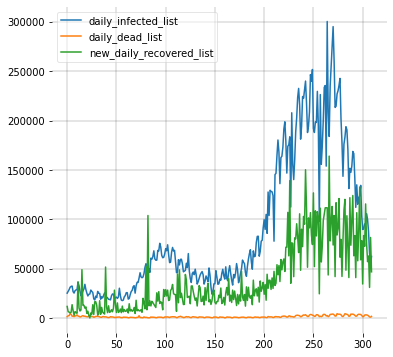

In [ ]:
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.set_facecolor('xkcd:white')

plt.plot(daily_infected_list[:310], label = 'daily_infected_list')
plt.plot(daily_dead_list[:310], label = 'daily_dead_list')
plt.plot(new_daily_recovered_list[:310], label = 'new_daily_recovered_list')

ax.grid(b=True, which='major', c='black', lw=0.2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show();

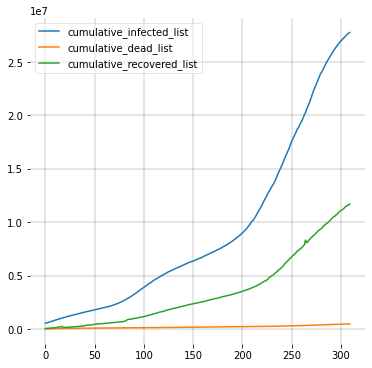

In [ ]:
N = 328e6

cumulative_susceptible_list = []
for i in range(len(cumulative_recovered_list)):
  cumulative_susceptible_list.append(N - cumulative_recovered_list[i] - cumulative_infected_list[i] - cumulative_dead_list[i])

fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.set_facecolor('xkcd:white')

# plt.plot(cumulative_susceptible_list[:310], label = 'cumulative_susceptible_list')
plt.plot(cumulative_infected_list[:310], label = 'cumulative_infected_list')
plt.plot(cumulative_dead_list[:310], label = 'cumulative_dead_list')
plt.plot(cumulative_recovered_list[:310], label = 'cumulative_recovered_list')

ax.grid(b=True, which='major', c='black', lw=0.2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show();

In [ ]:
#save as csv files

#cumulative cases [S,I,D,R]
df = pd.DataFrame(list(zip(cumulative_susceptible_list, cumulative_infected_list, cumulative_dead_list, cumulative_recovered_list)),
               columns =['cumulative_susceptible', 'cumulative_infected', 'cumulative_dead', 'cumulative_recovered'])
df.to_csv('covid_real_data_cumulative_cases.csv')

#daily cases [I,D,R]
df = pd.DataFrame(list(zip(daily_infected_list, daily_dead_list, new_daily_recovered_list)),
               columns =['daily_infected', 'daily_dead', 'daily_recovered'])
df.to_csv('covid_real_data_daily_cases.csv')